# Supervised Learning - Project

In this Project, we are going to perform a full supervised learning machine learning project on a "Diabetes" dataset. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. 

[Kaggle Dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

# Part I : EDA - Exploratory Data Analysis

For this task, you are required to conduct an exploratory data analysis on the diabetes dataset. You have the freedom to choose the visualizations you want to use, but your analysis should cover the following tasks mostly:

- Are there any missing values in the dataset?
- How are the predictor variables related to the outcome variable?
- What is the correlation between the predictor variables?
- What is the distribution of each predictor variable?
- Are there any outliers in the predictor variables?
- How are the predictor variables related to each other?
- Is there any interaction effect between the predictor variables?
- What is the average age of the individuals in the dataset?
- What is the average glucose level for individuals with diabetes and without diabetes?
- What is the average BMI for individuals with diabetes and without diabetes?
- How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?
- Are there any differences in the predictor variables between males and females (if gender information is available)?

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import plotly.express as px
import numpy as np
import seaborn as sns
import statistics
from scipy import stats
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, RocCurveDisplay

In [61]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.describe()
# Avg age is 33 years old

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df[(df['Outcome']== 1)].mean()
# Average glucose level for individuals with diabetes is 141
# Average BMI for individuals with diabetes is 35



Pregnancies                   4.865672
Glucose                     141.257463
BloodPressure                70.824627
SkinThickness                22.164179
Insulin                     100.335821
BMI                          35.142537
DiabetesPedigreeFunction      0.550500
Age                          37.067164
Outcome                       1.000000
dtype: float64

In [10]:
df[(df['Outcome']== 0)].mean()
# Average glucose level for individuals without diabetes is 110
# Average BMI for individuals without diabetes is 30


Pregnancies                   3.298000
Glucose                     109.980000
BloodPressure                68.184000
SkinThickness                19.664000
Insulin                      68.792000
BMI                          30.304200
DiabetesPedigreeFunction      0.429734
Age                          31.190000
Outcome                       0.000000
dtype: float64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [12]:
# There is no missing value
df.isnull().sum()
# no 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
# No duplication
df.duplicated().sum()

0

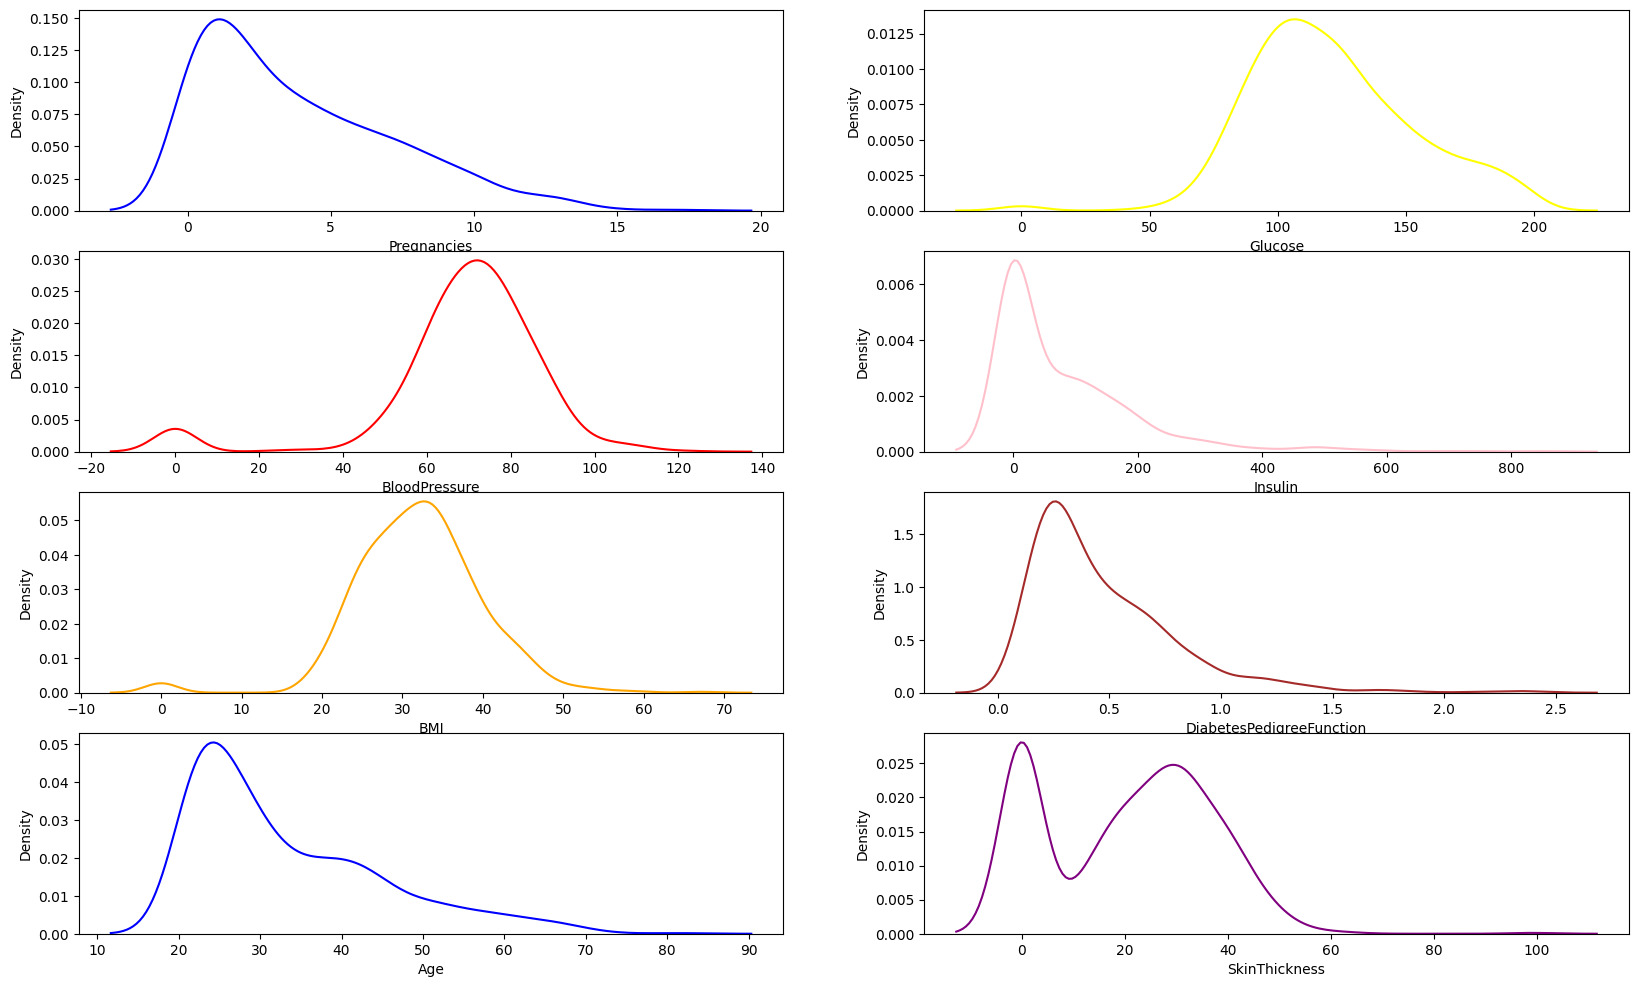

In [14]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 12))
ax = sns.kdeplot(data=df, x="Pregnancies", ax=axes[0,0], color='blue')
ax = sns.kdeplot(data=df, x="Glucose", ax=axes[0,1], color='yellow')
ax = sns.kdeplot(data=df, x="BloodPressure", ax=axes[1,0], color='red')
ax = sns.kdeplot(data=df, x="Insulin", ax=axes[1,1], color='pink')
ax = sns.kdeplot(data=df, x="BMI", ax=axes[2,0], color='orange')
ax = sns.kdeplot(data=df, x="DiabetesPedigreeFunction", ax=axes[2,1], color='brown')
ax = sns.kdeplot(data=df, x="Age", ax=axes[3,0], color='blue')
ax = sns.kdeplot(data=df, x="SkinThickness", ax=axes[3,1], color='purple')

In [15]:
stat, p = stats.shapiro(df['BMI'])
print('%0.30f' % p)
if p > 0.05:
    print('Probably normally distributed')
else:
    print('Probably not normally distributed')

0.000000000000001840758660204126
Probably not normally distributed


In [16]:
stat, p = stats.shapiro(df['Glucose'])
print('%0.30f' % p)
if p > 0.05:
    print('Probably normally distributed')
else:
    print('Probably not normally distributed')

0.000000000019874648801709859924
Probably not normally distributed


# Part II : Preprocessing & Feature Engineering

You need to perform preprocessing on the given dataset. Please consider the following tasks and carry out the necessary steps accordingly.
- Handling missing values
- Handling outliers
- Scaling and normalization
- Feature Engineering
- Handling imbalanced data

In [17]:
# there is one outlier (Glucose = 0)
fig = px.box(df, y='Glucose',width=600, height=400)
fig.show()

In [62]:
df[df['Glucose']== 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [63]:
df_G_1 = df[(df['Glucose'] > 0) & (df['Outcome']== 1)]
df_G_0 = df[(df['Glucose'] > 0) & (df['Outcome']== 0)]

In [64]:
# Glucose level can't be zero, so will impute the value using the median becuase glucose data is not mormally distributed
df['Glucose'] = df.apply(lambda x:statistics.median(df_G_1['Glucose']) if ((x['Glucose'] ==0) & (x['Outcome']==1))  else x['Glucose'], axis=1)
df['Glucose'] = df.apply(lambda x:statistics.median(df_G_0['Glucose']) if ((x['Glucose'] ==0) & (x['Outcome']==0))  else x['Glucose'], axis=1)

In [34]:
# There are some outliers in BloodPressure
fig = px.box(df, y='BloodPressure',width=600, height=400)
fig.show()

In [35]:
df[df['BloodPressure']== 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115.0,0,0,0,35.3,0.134,29,0
15,7,100.0,0,0,0,30.0,0.484,32,1
49,7,105.0,0,0,0,0.0,0.305,24,0
60,2,84.0,0,0,0,0.0,0.304,21,0
78,0,131.0,0,0,0,43.2,0.270,26,1
81,2,74.0,0,0,0,0.0,0.102,22,0
172,2,87.0,0,23,0,28.9,0.773,25,0
193,11,135.0,0,0,0,52.3,0.578,40,1
222,7,119.0,0,0,0,25.2,0.209,37,0
261,3,141.0,0,0,0,30.0,0.761,27,1


In [65]:
df_B_1 = df[(df['BloodPressure'] > 0) & (df['Outcome']== 1)]
df_B_0 = df[(df['BloodPressure'] > 0) & (df['Outcome']== 0)]

In [66]:
# BloodPressure level can't be zero, so will impute the value using the median becuase BloodPressure data is not mormally distributed
df['BloodPressure'] = df.apply(lambda x:statistics.median(df_B_1['BloodPressure']) if ((x['BloodPressure'] ==0) & (x['Outcome']==1))  else x['BloodPressure'], axis=1)
df['BloodPressure'] = df.apply(lambda x:statistics.median(df_B_0['BloodPressure']) if ((x['BloodPressure'] ==0) & (x['Outcome']==0))  else x['BloodPressure'], axis=1)

In [38]:
# There are some outliers in Age, but it's okay
fig = px.box(df, y='Age',width=600, height=400)
fig.show()

In [39]:
# There are some outliers in inaulin
fig = px.box(df, y='Insulin',width=600, height=400)
fig.show()

In [40]:
fig = px.box(df, y='BMI',width=600, height=400)
fig.show()

In [41]:
df[df['BMI']== 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125.0,96.0,0,0,0.0,0.232,54,1
49,7,105.0,70.0,0,0,0.0,0.305,24,0
60,2,84.0,70.0,0,0,0.0,0.304,21,0
81,2,74.0,70.0,0,0,0.0,0.102,22,0
145,0,102.0,75.0,23,0,0.0,0.572,21,0
371,0,118.0,64.0,23,89,0.0,1.731,21,0
426,0,94.0,70.0,0,0,0.0,0.256,25,0
494,3,80.0,70.0,0,0,0.0,0.174,22,0
522,6,114.0,70.0,0,0,0.0,0.189,26,0
684,5,136.0,82.0,0,0,0.0,0.640,69,0


In [67]:
df_BMI_1 = df[(df['BMI'] > 0) & (df['Outcome']== 1)]
df_BMI_0 = df[(df['BMI'] > 0) & (df['Outcome']== 0)]

In [68]:
# BMI level can't be zero, so will impute the value using the median
df['BMI'] = df.apply(lambda x:statistics.median(df_BMI_1['BMI']) if ((x['BMI'] ==0) & (x['Outcome']==1))  else x['BMI'], axis=1)
df['BMI'] = df.apply(lambda x:statistics.median(df_BMI_0['BMI']) if ((x['BMI'] ==0) & (x['Outcome']==0))  else x['BMI'], axis=1)

In [44]:
fig = px.box(df, y='DiabetesPedigreeFunction',width=600, height=400)
fig.show()

In [45]:

fig = px.box(df, y='Pregnancies',width=600, height=400)
fig.show()

In [46]:
fig = px.box(df, y='SkinThickness',width=600, height=400)
fig.show()

In [47]:
df[df['SkinThickness']== 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8,183.0,64.0,0,0,23.3,0.672,32,1
5,5,116.0,74.0,0,0,25.6,0.201,30,0
7,10,115.0,70.0,0,0,35.3,0.134,29,0
9,8,125.0,96.0,0,0,34.3,0.232,54,1
10,4,110.0,92.0,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
757,0,123.0,72.0,0,0,36.3,0.258,52,1
758,1,106.0,76.0,0,0,37.5,0.197,26,0
759,6,190.0,92.0,0,0,35.5,0.278,66,1
762,9,89.0,62.0,0,0,22.5,0.142,33,0


In [69]:
df_ST_1 = df[(df['SkinThickness'] > 0) & (df['Outcome']== 1)]
df_ST_0 = df[(df['SkinThickness'] > 0) & (df['Outcome']== 0)]

In [70]:
# SkinThickness level can't be zero, so will impute the value using the median becuase SkinThickness data is not mormally distributed
df['SkinThickness'] = df.apply(lambda x:statistics.median(df_ST_1['SkinThickness']) if ((x['SkinThickness'] ==0) & (x['Outcome']==1))  else x['SkinThickness'], axis=1)
df['SkinThickness'] = df.apply(lambda x:statistics.median(df_ST_0['SkinThickness']) if ((x['SkinThickness'] ==0) & (x['Outcome']==0))  else x['SkinThickness'], axis=1)

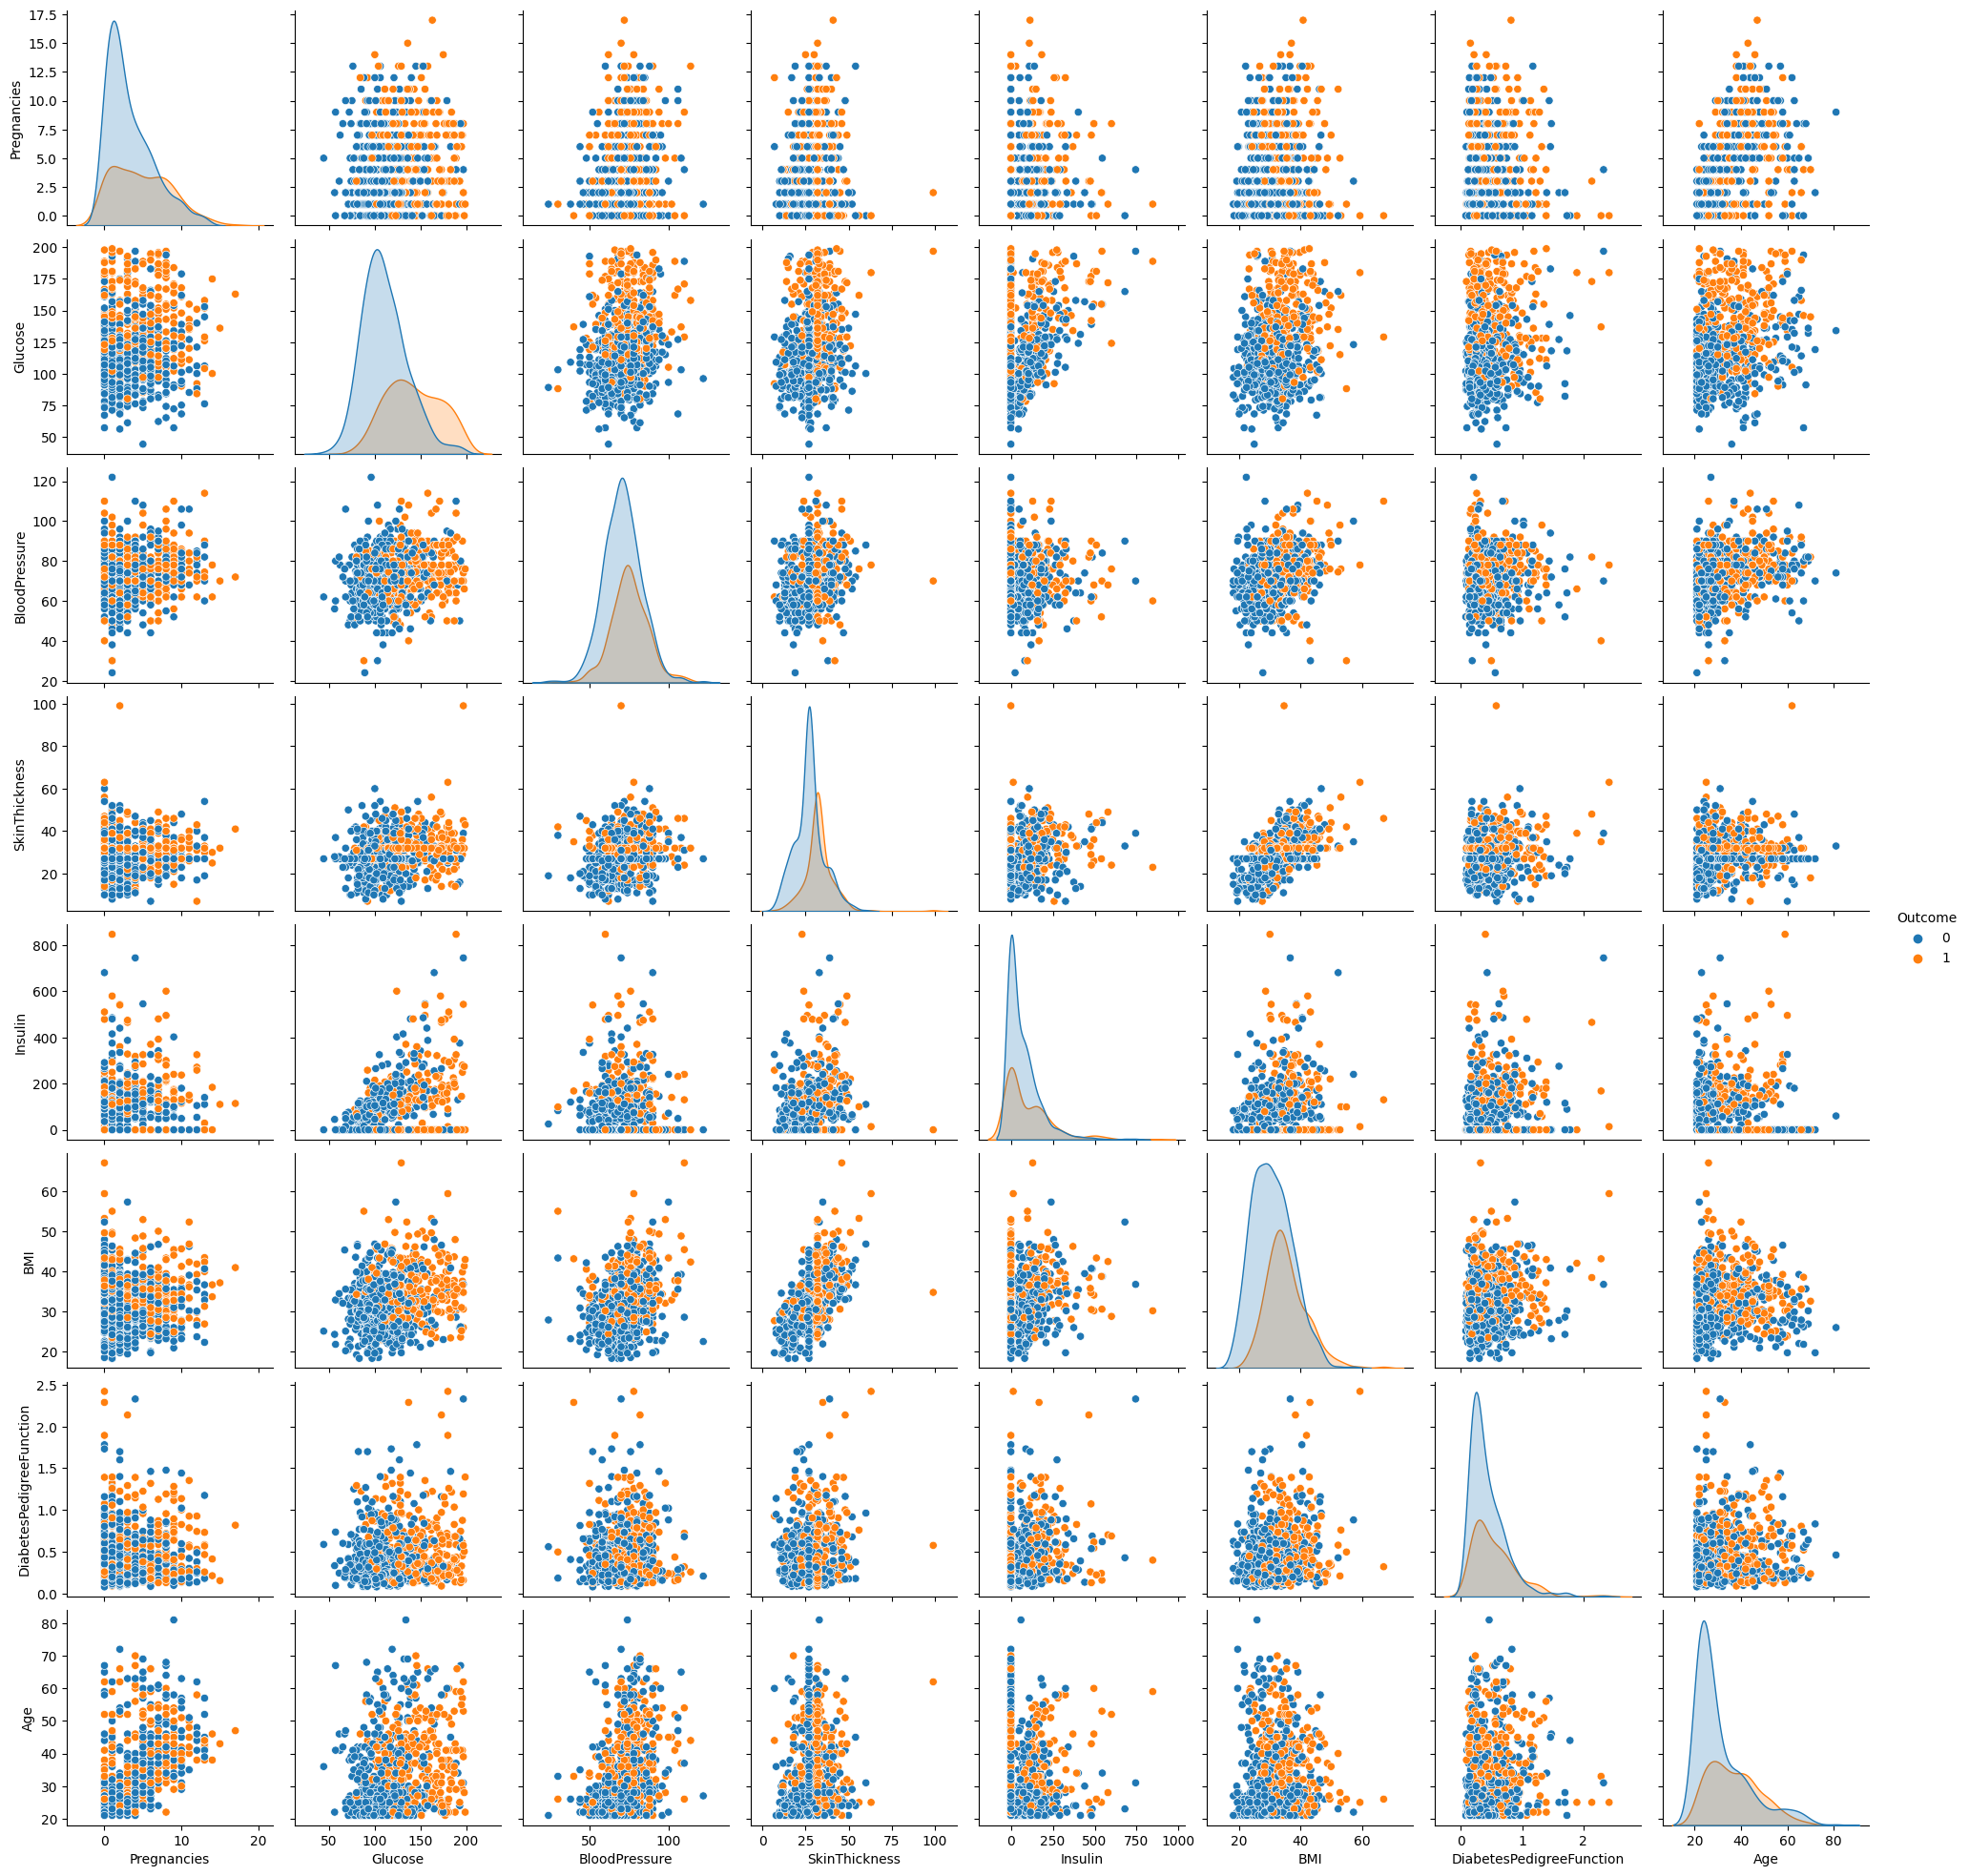

In [71]:
sns.pairplot(df, hue="Outcome")
plt.show()

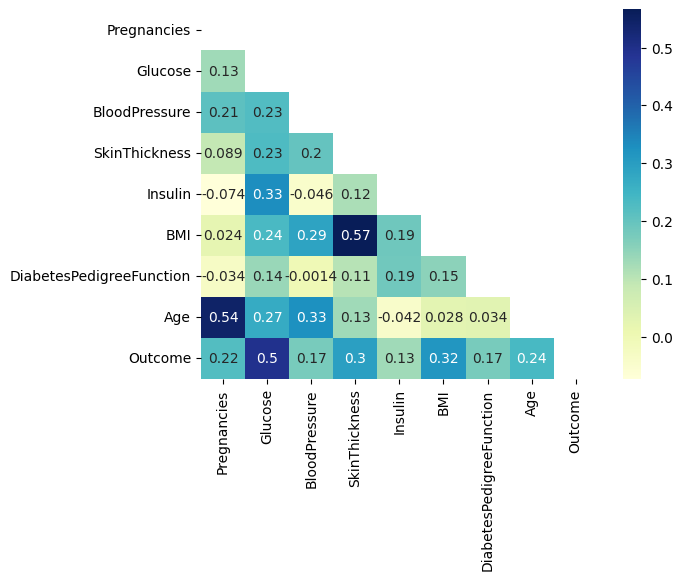

In [72]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
#df.corr()
dataplot = sns.heatmap(df.corr(), mask=mask, cmap="YlGnBu", annot=True)
plt.show()

#### There is a correalion between Age & Pregancies, SkinThickness & BMI, Glucose & Outcome

In [73]:
df_0 = df[df.Outcome == 0] # without diabetes
df_1 = df[df.Outcome == 1] # with diabetes 

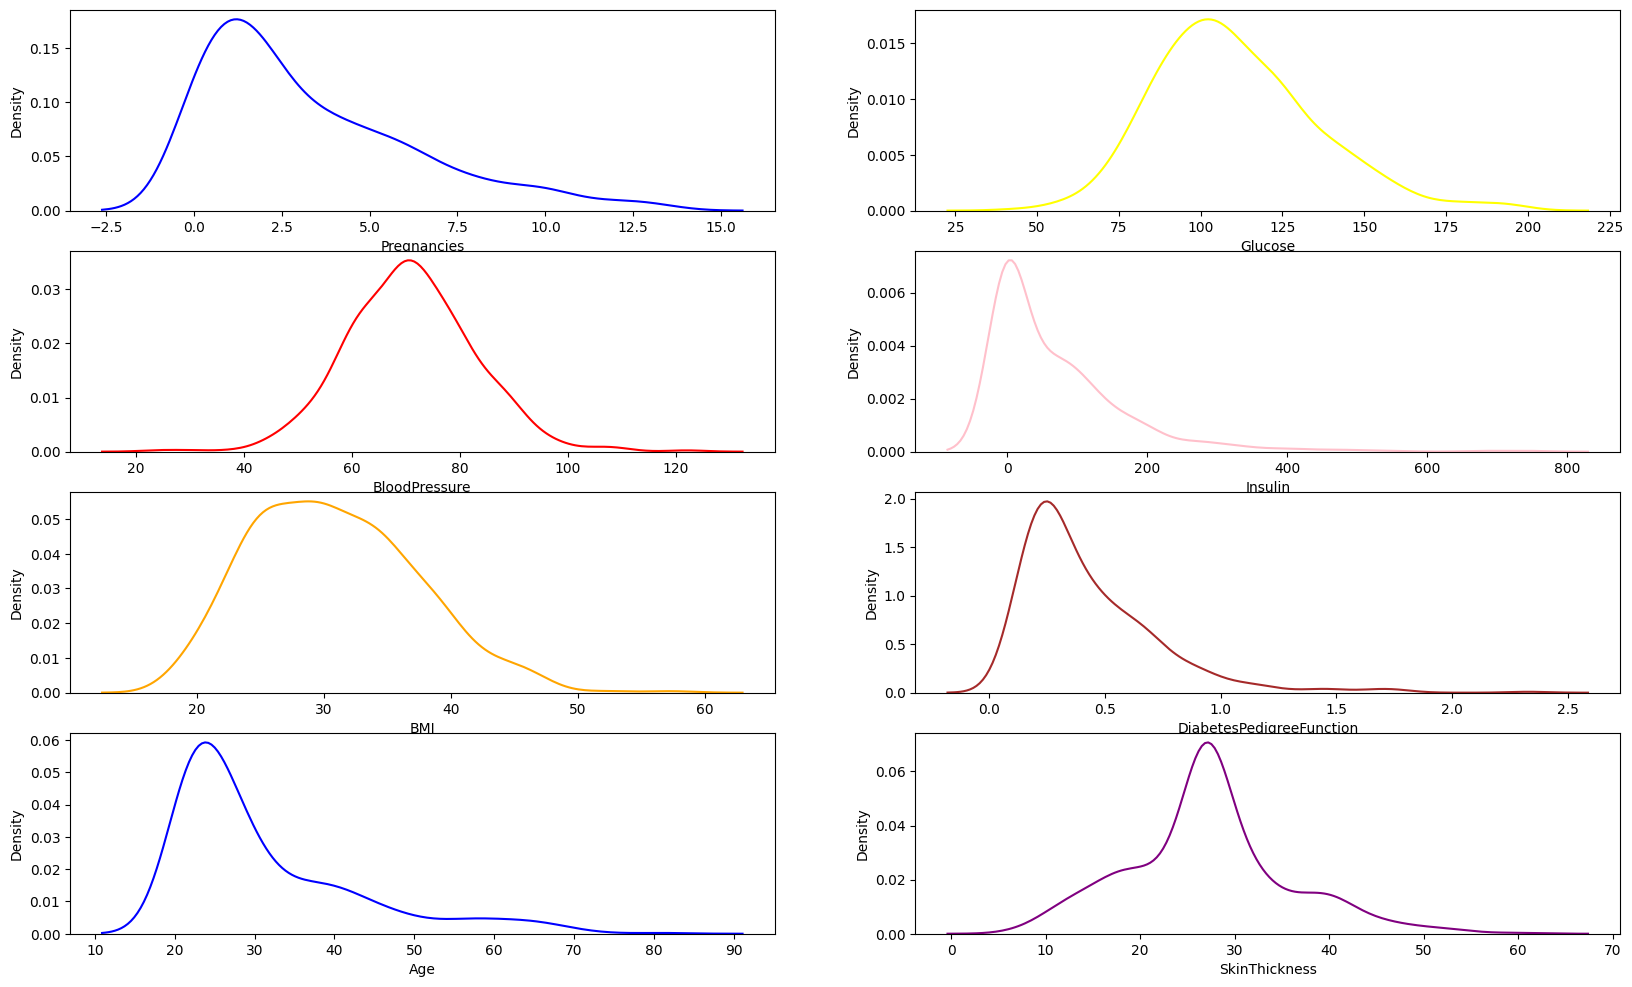

In [74]:
# without diabetes distribution
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 12))
ax = sns.kdeplot(data=df_0, x="Pregnancies", ax=axes[0,0], color='blue')
ax = sns.kdeplot(data=df_0, x="Glucose", ax=axes[0,1], color='yellow')
ax = sns.kdeplot(data=df_0, x="BloodPressure", ax=axes[1,0], color='red')
ax = sns.kdeplot(data=df_0, x="Insulin", ax=axes[1,1], color='pink')
ax = sns.kdeplot(data=df_0, x="BMI", ax=axes[2,0], color='orange')
ax = sns.kdeplot(data=df_0, x="DiabetesPedigreeFunction", ax=axes[2,1], color='brown')
ax = sns.kdeplot(data=df_0, x="Age", ax=axes[3,0], color='blue')
ax = sns.kdeplot(data=df_0, x="SkinThickness", ax=axes[3,1], color='purple')

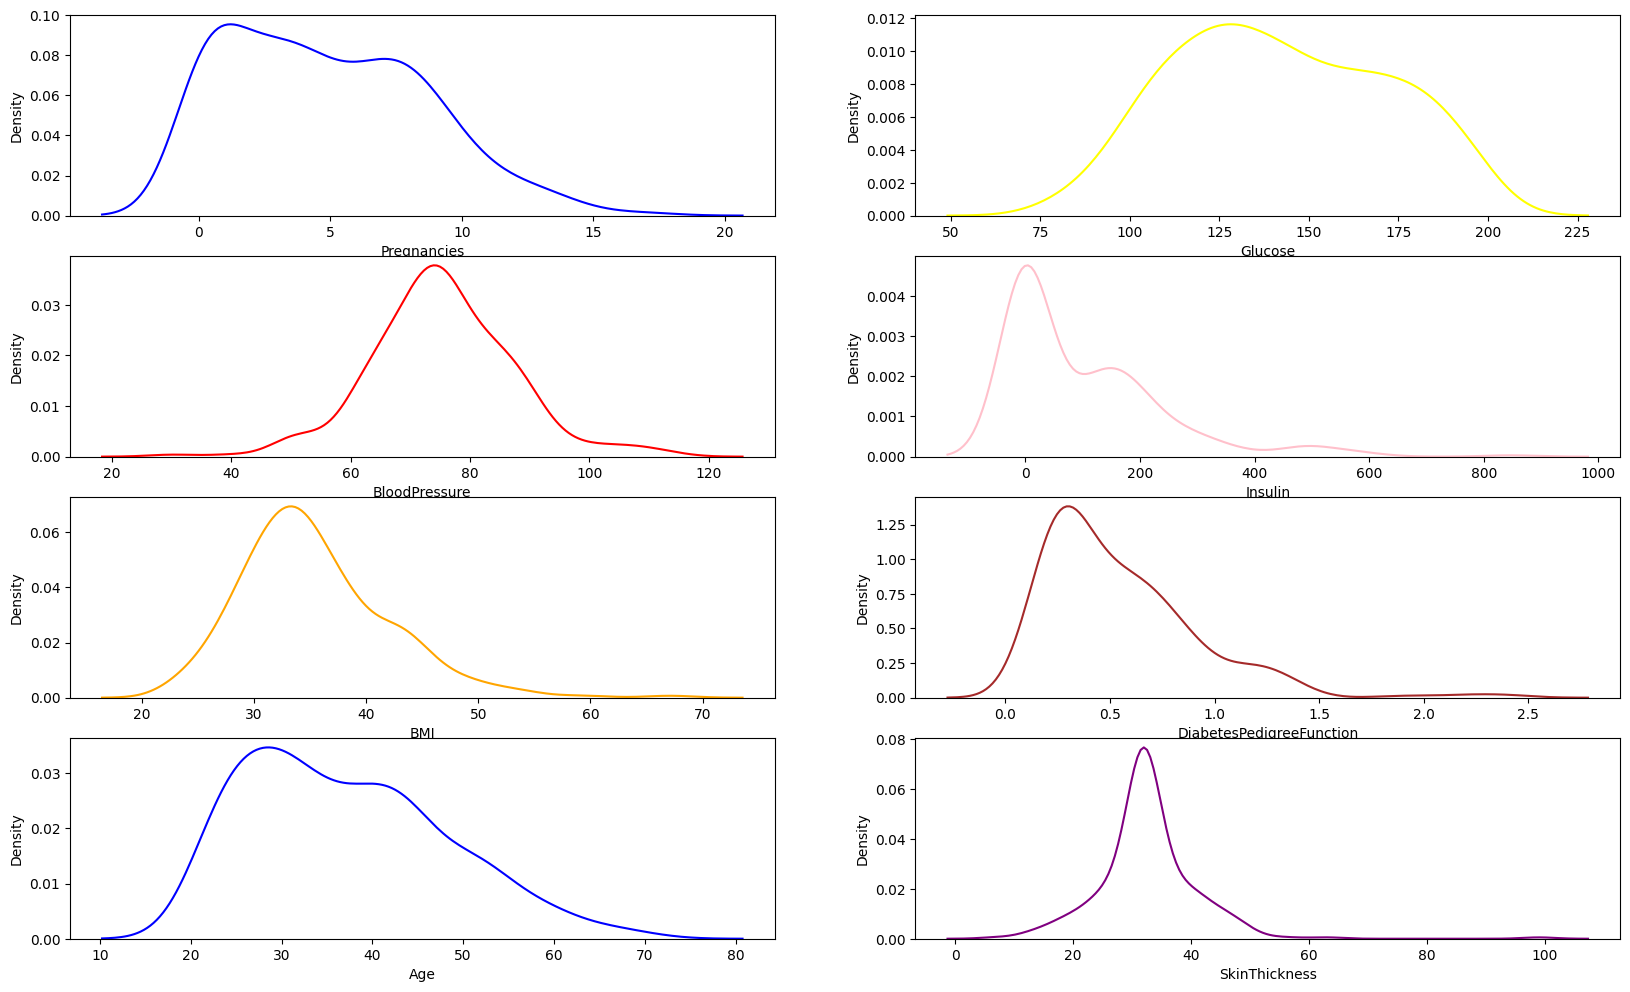

In [75]:
# with diabetes distribution
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 12))
ax = sns.kdeplot(data=df_1, x="Pregnancies", ax=axes[0,0], color='blue')
ax = sns.kdeplot(data=df_1, x="Glucose", ax=axes[0,1], color='yellow')
ax = sns.kdeplot(data=df_1, x="BloodPressure", ax=axes[1,0], color='red')
ax = sns.kdeplot(data=df_1, x="Insulin", ax=axes[1,1], color='pink')
ax = sns.kdeplot(data=df_1, x="BMI", ax=axes[2,0], color='orange')
ax = sns.kdeplot(data=df_1, x="DiabetesPedigreeFunction", ax=axes[2,1], color='brown')
ax = sns.kdeplot(data=df_1, x="Age", ax=axes[3,0], color='blue')
ax = sns.kdeplot(data=df_1, x="SkinThickness", ax=axes[3,1], color='purple')

In [76]:
fig = px.histogram(df, x='Outcome', color_discrete_map= {1:'orange', 2:'green'}, color='Outcome', width=600, height=400)
fig.show()
# dataset is imbalanced

In [77]:
# Separate features from target
X = df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y= df['Outcome']

In [78]:
# Scale the data
from sklearn import preprocessing
MinMaxScaler = preprocessing.MinMaxScaler()
X_minmax = MinMaxScaler.fit_transform(X)

In [79]:
X = pd.DataFrame(X_minmax,columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.670968,0.489796,0.304348,0.000000,0.314928,0.234415,0.483333
1,0.058824,0.264516,0.428571,0.239130,0.000000,0.171779,0.116567,0.166667
2,0.470588,0.896774,0.408163,0.271739,0.000000,0.104294,0.253629,0.183333
3,0.058824,0.290323,0.428571,0.173913,0.111111,0.202454,0.038002,0.000000
4,0.000000,0.600000,0.163265,0.304348,0.198582,0.509202,0.943638,0.200000


In [80]:
mn = sm.MNLogit(y,sm.add_constant(X))

In [81]:
model = mn.fit()
print_model = model.summary()
print(print_model)


Optimization terminated successfully.
         Current function value: 0.456015
         Iterations 6
                          MNLogit Regression Results                          
Dep. Variable:                Outcome   No. Observations:                  768
Model:                        MNLogit   Df Residuals:                      759
Method:                           MLE   Df Model:                            8
Date:                Thu, 03 Aug 2023   Pseudo R-squ.:                  0.2950
Time:                        23:19:54   Log-Likelihood:                -350.22
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 1.243e-58
               Outcome=1       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -6.1411      0.549    -11.192      0.000      -7.216

#### All features are statistically significant except for the Age and BloodPressure. For now we will keep them in the model.

# Part III : Training ML Model

For this task, you are required to build a machine learning model to predict the outcome variable. This will be a binary classification task, as the target variable is binary. You should select at least two models, one of which should be an ensemble model, and compare their performance.

- Train the models: Train the selected models on the training set.
- Model evaluation: Evaluate the trained models on the testing set using appropriate evaluation metrics, such as accuracy, precision, recall, F1-score, and ROC-AUC.
- Model comparison: Compare the performance of the selected models and choose the best-performing model based on the evaluation metrics. You can also perform additional analysis, such as model tuning and cross-validation, to improve the model's performance.

In [83]:
# Separate features from target
X = df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y= df['Outcome']

In [86]:
# balance the dataset
from imblearn.over_sampling import RandomOverSampler
OverSample=RandomOverSampler(random_state=0, sampling_strategy='minority')
X_over,y_over=OverSample.fit_resample(X,y)

In [87]:
from sklearn.model_selection import train_test_split
X_OS_train, X_OS_test, y_OS_train, y_OS_test = train_test_split(X_over, y_over, test_size=0.2, random_state=0)

#### Build Logistic Regression this will be our bench mark

In [89]:
from sklearn.linear_model import LogisticRegression
logre = LogisticRegression(max_iter=10000)
logre.fit(X_OS_train, y_OS_train)

LogisticRegression(max_iter=10000)

In [90]:
y_logpred = logre.predict(X_OS_test)

In [91]:
print('Log loss = {:.5f}'.format(log_loss(y_OS_test, y_logpred)))
print('AUC = {:.5f}'.format(roc_auc_score(y_OS_test, y_logpred)))
print('Average Precision = {:.5f}'.format(average_precision_score(y_OS_test, y_logpred)))
print('\nUsing 0.5 as threshold:')
print('Accuracy = {:.5f}'.format(accuracy_score(y_OS_test, y_logpred)))
print('Precision = {:.5f}'.format(precision_score(y_OS_test, y_logpred)))
print('Recall = {:.5f}'.format(recall_score(y_OS_test, y_logpred)))
print('F1 score = {:.5f}'.format(f1_score(y_OS_test, y_logpred)))

print('\nClassification Report')
print(classification_report(y_OS_test, y_logpred))

Log loss = 5.76698
AUC = 0.84060
Average Precision = 0.76761

Using 0.5 as threshold:
Accuracy = 0.84000
Precision = 0.81818
Recall = 0.85263
F1 score = 0.83505

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.83      0.84       105
           1       0.82      0.85      0.84        95

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200



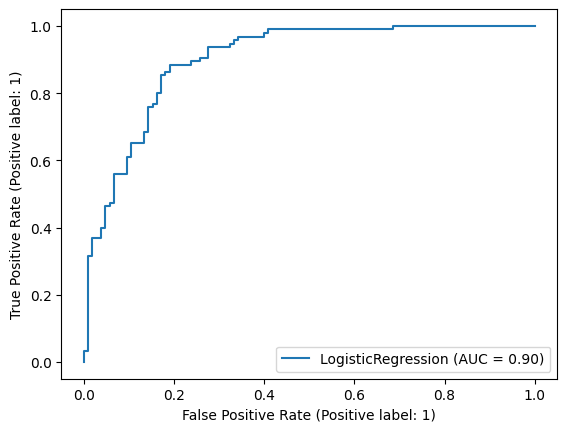

In [92]:
RocCurveDisplay.from_estimator(logre, X_OS_test, y_OS_test)

#### Decision Tree Model

In [93]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(X_OS_train, y_OS_train)
y_dtcpred = dtc.predict(X_OS_test)

In [94]:
print('Log loss = {:.5f}'.format(log_loss(y_OS_test, y_dtcpred)))
print('AUC = {:.5f}'.format(roc_auc_score(y_OS_test, y_dtcpred)))
print('Average Precision = {:.5f}'.format(average_precision_score(y_OS_test, y_dtcpred)))
print('\nUsing 0.5 as threshold:')
print('Accuracy = {:.5f}'.format(accuracy_score(y_OS_test, y_dtcpred)))
print('Precision = {:.5f}'.format(precision_score(y_OS_test, y_dtcpred)))
print('Recall = {:.5f}'.format(recall_score(y_OS_test, y_dtcpred)))
print('F1 score = {:.5f}'.format(f1_score(y_OS_test, y_dtcpred)))

print('\nClassification Report')
print(classification_report(y_OS_test, y_dtcpred))

Log loss = 6.66808
AUC = 0.81378
Average Precision = 0.74359

Using 0.5 as threshold:
Accuracy = 0.81500
Precision = 0.81522
Recall = 0.78947
F1 score = 0.80214

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       105
           1       0.82      0.79      0.80        95

    accuracy                           0.81       200
   macro avg       0.82      0.81      0.81       200
weighted avg       0.82      0.81      0.81       200



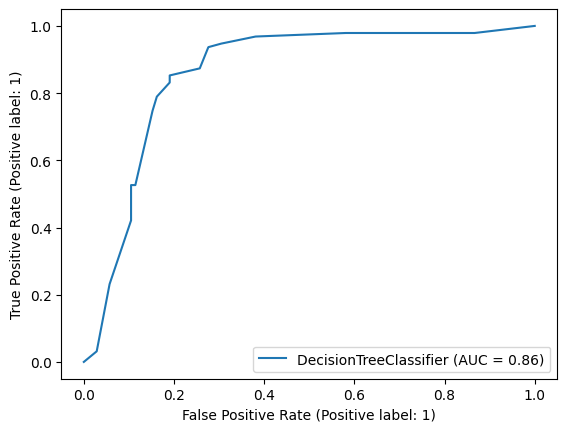

In [95]:
RocCurveDisplay.from_estimator(dtc, X_OS_test, y_OS_test)

#### Random Forest Tree Model

In [96]:
rft = RandomForestClassifier(n_estimators=100, max_depth=5, random_state= 45)
rft.fit(X_OS_train, y_OS_train)
y_rftpred = rft.predict(X_OS_test)

In [97]:
print('Log loss = {:.5f}'.format(log_loss(y_OS_test, y_rftpred)))
print('AUC = {:.5f}'.format(roc_auc_score(y_OS_test, y_rftpred)))
print('Average Precision = {:.5f}'.format(average_precision_score(y_OS_test, y_rftpred)))
print('\nUsing 0.5 as threshold:')

print('Accuracy = {:.5f}'.format(accuracy_score(y_OS_test, y_rftpred)))
print('Precision = {:.5f}'.format(precision_score(y_OS_test, y_rftpred)))
print('Recall = {:.5f}'.format(recall_score(y_OS_test, y_rftpred)))
print('F1 score = {:.5f}'.format(f1_score(y_OS_test, y_rftpred)))

print('\nClassification Report')
print(classification_report(y_OS_test, y_rftpred))

Log loss = 3.78458
AUC = 0.89799
Average Precision = 0.82712

Using 0.5 as threshold:
Accuracy = 0.89500
Precision = 0.84259
Recall = 0.95789
F1 score = 0.89655

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.84      0.89       105
           1       0.84      0.96      0.90        95

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.89       200
weighted avg       0.90      0.90      0.89       200



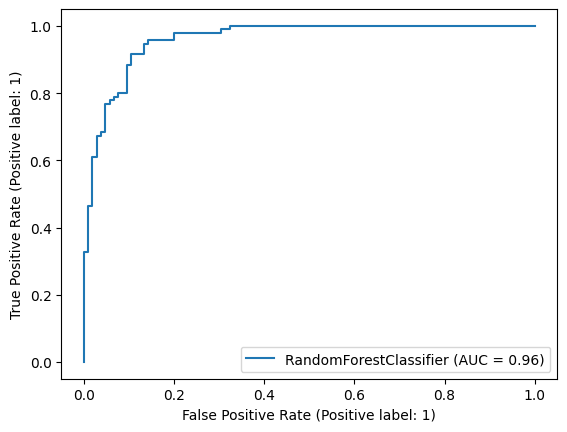

In [98]:
RocCurveDisplay.from_estimator(rft, X_OS_test, y_OS_test)

In [99]:
feature_scores = pd.Series(rft.feature_importances_, index=X_OS_train.columns).sort_values(ascending=False)
feature_scores

SkinThickness               0.274307
Glucose                     0.242430
BMI                         0.121540
Age                         0.112810
Insulin                     0.092289
DiabetesPedigreeFunction    0.076688
Pregnancies                 0.046933
BloodPressure               0.033002
dtype: float64

In [100]:
#remove Age and BloodPressure
X = df[['Pregnancies','Glucose','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']]
y= df['Outcome']

In [101]:
OverSample=RandomOverSampler(random_state=0, sampling_strategy='minority')
X_over,y_over=OverSample.fit_resample(X,y)

In [102]:
X_OS_train, X_OS_test, y_OS_train, y_OS_test = train_test_split(X_over, y_over, test_size=0.2, random_state=0)

In [103]:
rft = RandomForestClassifier(n_estimators=100, max_depth=5, random_state= 45)
rft.fit(X_OS_train, y_OS_train)
y_rftpred = rft.predict(X_OS_test)

In [104]:
print('Log loss = {:.5f}'.format(log_loss(y_OS_test, y_rftpred)))
print('AUC = {:.5f}'.format(roc_auc_score(y_OS_test, y_rftpred)))
print('Average Precision = {:.5f}'.format(average_precision_score(y_OS_test, y_rftpred)))
print('\nUsing 0.5 as threshold:')

print('Accuracy = {:.5f}'.format(accuracy_score(y_OS_test, y_rftpred)))
print('Precision = {:.5f}'.format(precision_score(y_OS_test, y_rftpred)))
print('Recall = {:.5f}'.format(recall_score(y_OS_test, y_rftpred)))
print('F1 score = {:.5f}'.format(f1_score(y_OS_test, y_rftpred)))

print('\nClassification Report')
print(classification_report(y_OS_test, y_rftpred))

Log loss = 4.68567
AUC = 0.87318
Average Precision = 0.79494

Using 0.5 as threshold:
Accuracy = 0.87000
Precision = 0.81651
Recall = 0.93684
F1 score = 0.87255

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.81      0.87       105
           1       0.82      0.94      0.87        95

    accuracy                           0.87       200
   macro avg       0.88      0.87      0.87       200
weighted avg       0.88      0.87      0.87       200



# Part IV : Conclusion

From the machine learning models developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

- The dataset has no missing values, but it has a lot of unrealistic information. e.g. BMI = 0.
- Random Forest Tree gives the best result with 84% accuracy.
- Insulin is the most important feature.
- BloodPressure is the least important, which surprise me!!

